In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from scipy import stats
from scipy.stats import boxcox
import scipy
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
SolarState = pd.read_excel('C:/Users/claud/OneDrive/Documents/1FinalP/SeiaOrg2.xlsx')

In [20]:
SolarState.head()

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
0,AL,0.26,35,30050,0.0028,42,339000000,0.36,1349,27
1,AK,0.26,49,1502,0.0019,12,33000000,0.36,30,51
2,AZ,0.26,5,907817,0.0823,361,14600000000,0.36,5316,7
3,AR,0.26,30,45613,0.0087,32,527000000,0.36,982,32
4,CA,0.26,1,8430324,0.2425,2438,74500000000,0.36,21444,2


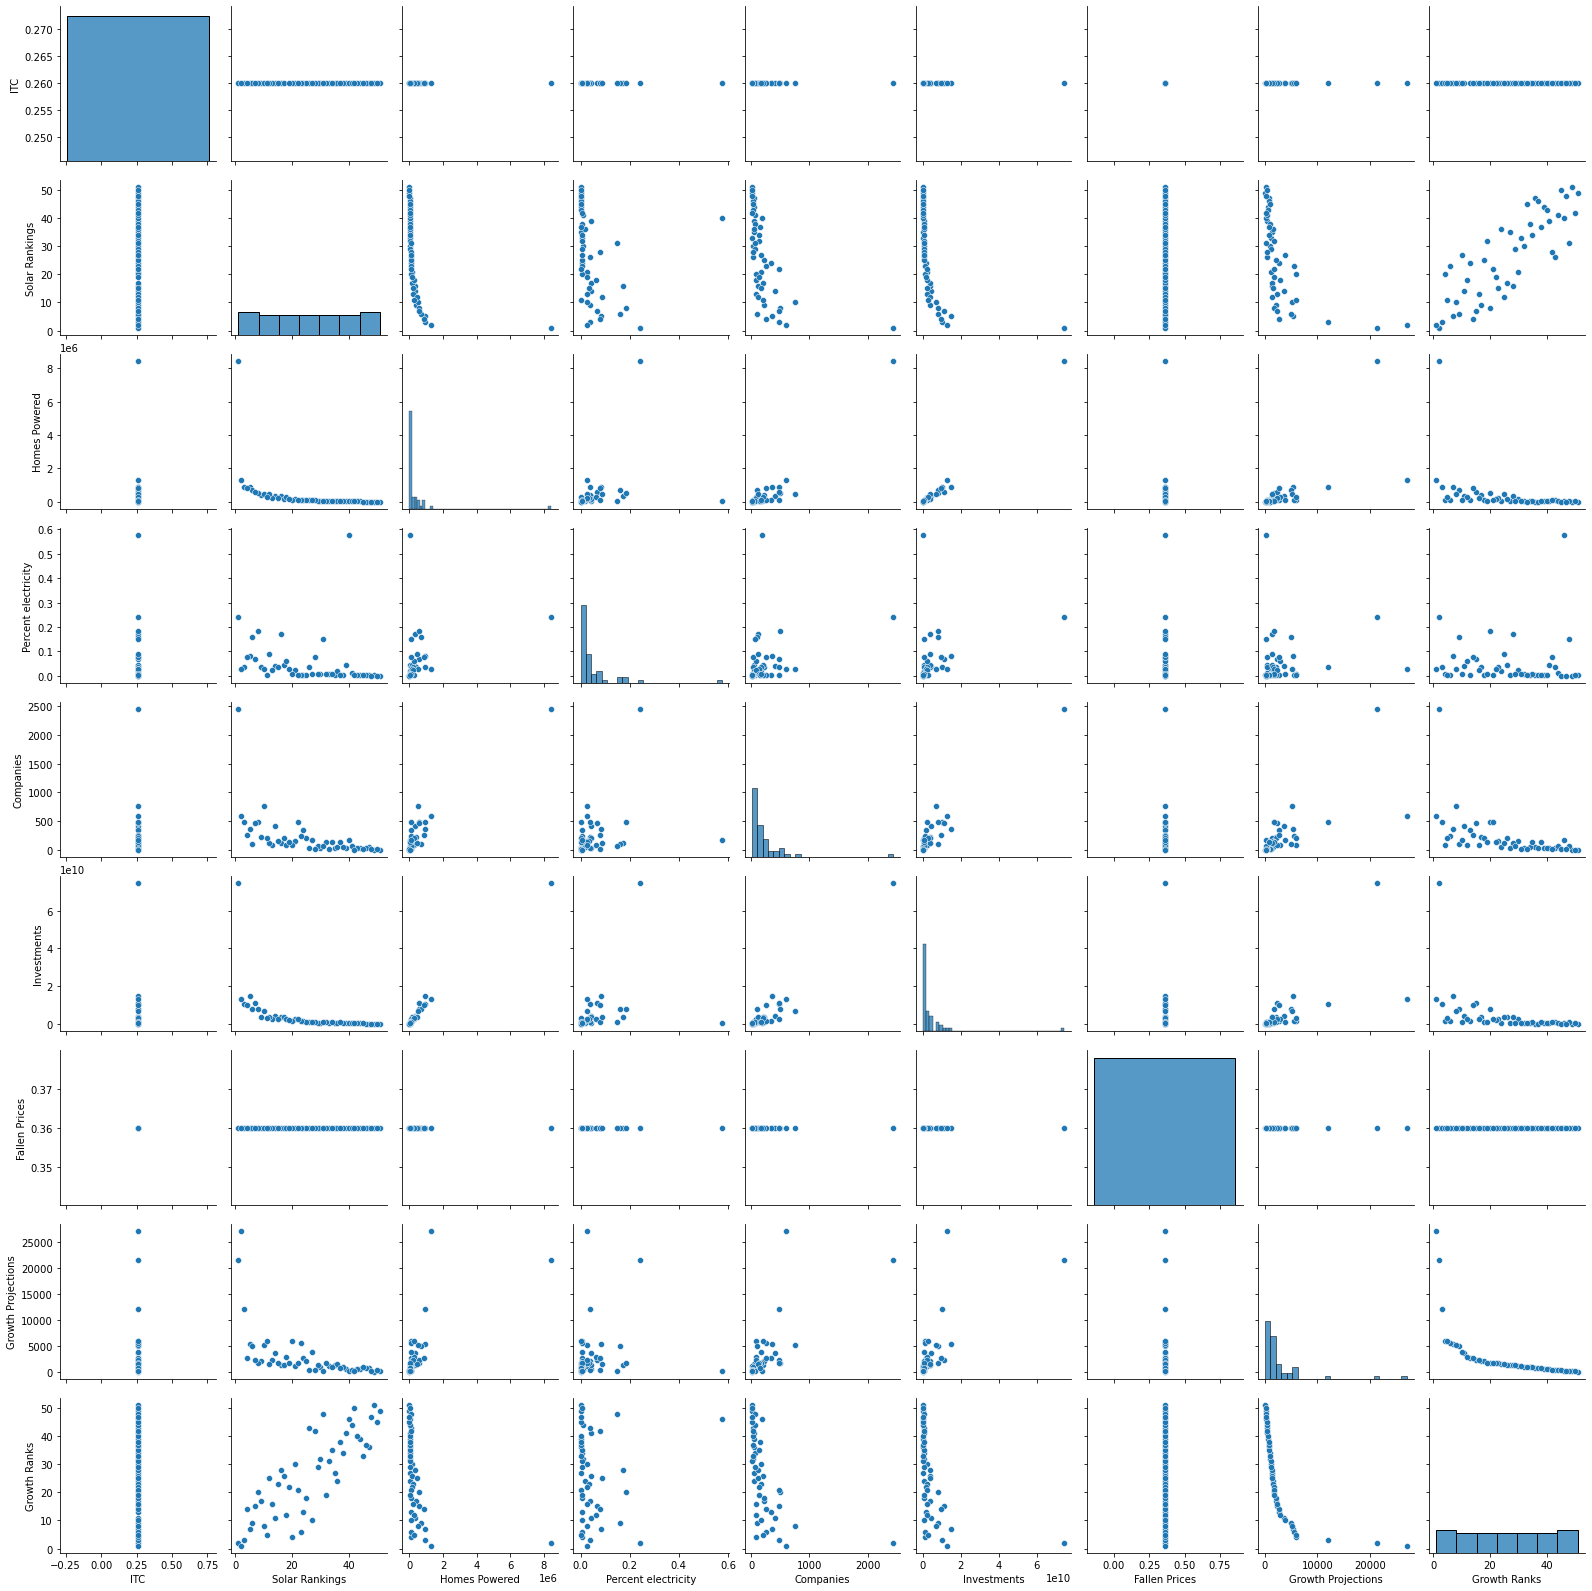

In [21]:
sns.pairplot(SolarState)

# As per the results from Seia.Org Texas is the highest Solar Power generation and rankings

In [22]:
continuous_vars = ['Solar Rankings','Powered by Solar','Percent electricity','Companies','Investments','Fallen Prices','Growth Projections','Projected Ranks']

In [23]:
SolarState['Solar Rankings']

0     35
1     49
2      5
3     30
4      1
5     14
6     21
7     39
8     40
9      3
10     9
11    16
12    26
13    24
14    20
15    29
16    44
17    47
18    38
19    36
20    17
21     8
22    25
23    15
24    33
25    34
26    43
27    46
28     6
29    41
30     7
31    18
32    10
33     4
34    51
35    23
36    45
37    19
38    22
39    28
40    13
41    50
42    32
43     2
44    12
45    31
46    11
47    37
48    48
49    27
50    42
Name: Solar Rankings, dtype: int64

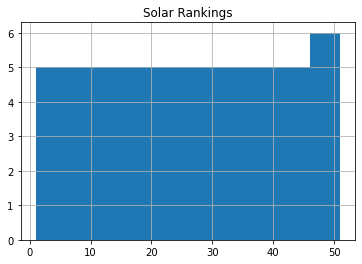

KeyError: 'Powered by Solar'

In [25]:
for cv in continuous_vars:
    SolarState[cv].hist()
    plt.title(cv)
    plt.show()

In [26]:
sns.scatterplot(x='Powered by Solar', y= 'Percent electricity', data=SolarState)

ValueError: Could not interpret value `Powered by Solar` for parameter `x`

<AxesSubplot:>

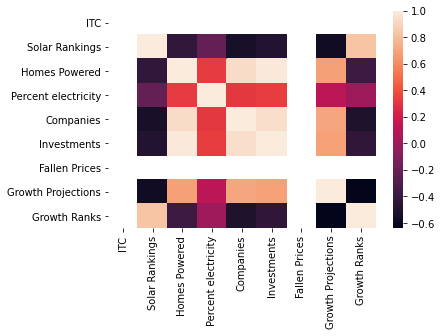

In [27]:
sns.heatmap(SolarState.corr())

In [28]:
SolarState["State"].values

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [29]:
SolarState['Region'] = SolarState["State"].replace(['NJ', 'OH', 'TX', 'VA'],
                                                   ["Northeast", "Midwest", "Southwest", "Southeast"])

In [30]:
SolarState

,State,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks,Region
0,AL,0.26,35,30050,0.00280,42,339000000,0.36,1349,27,AL
1,AK,0.26,49,1502,0.00190,12,33000000,0.36,30,51,AK
2,AZ,0.26,5,907817,0.08230,361,14600000000,0.36,5316,7,AZ
3,AR,0.26,30,45613,0.00870,32,527000000,0.36,982,32,AR
4,CA,0.26,1,8430324,0.24250,2438,74500000000,0.36,21444,2,CA
5,CO,0.26,14,335951,0.04180,415,4300000000,0.36,3683,11,CO
6,CT,0.26,21,134691,0.02450,163,2400000000,0.36,1113,30,CT
7,DE,0.26,39,18287,0.04320,43,468000000,0.36,468,41,DE
8,DC,0.26,40,22894,0.57580,179,359000000,0.36,245,46,DC
9,FL,0.26,3,908181,0.03740,482,10300000000,0.36,12046,3,FL


In [31]:
SolarState.groupby("Region").mean()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
Region,,,,,,,,,
AK,0.26,49,1502,0.00190,12,33000000,0.36,30,51
AL,0.26,35,30050,0.00280,42,339000000,0.36,1349,27
AR,0.26,30,45613,0.00870,32,527000000,0.36,982,32
AZ,0.26,5,907817,0.08230,361,14600000000,0.36,5316,7
CA,0.26,1,8430324,0.24250,2438,74500000000,0.36,21444,2
CO,0.26,14,335951,0.04180,415,4300000000,0.36,3683,11
CT,0.26,21,134691,0.02450,163,2400000000,0.36,1113,30
DC,0.26,40,22894,0.57580,179,359000000,0.36,245,46
DE,0.26,39,18287,0.04320,43,468000000,0.36,468,41


In [32]:
SolarState.groupby("Region").median()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
Region,,,,,,,,,
AK,0.26,49,1502,0.00190,12,33000000,0.36,30,51
AL,0.26,35,30050,0.00280,42,339000000,0.36,1349,27
AR,0.26,30,45613,0.00870,32,527000000,0.36,982,32
AZ,0.26,5,907817,0.08230,361,14600000000,0.36,5316,7
CA,0.26,1,8430324,0.24250,2438,74500000000,0.36,21444,2
CO,0.26,14,335951,0.04180,415,4300000000,0.36,3683,11
CT,0.26,21,134691,0.02450,163,2400000000,0.36,1113,30
DC,0.26,40,22894,0.57580,179,359000000,0.36,245,46
DE,0.26,39,18287,0.04320,43,468000000,0.36,468,41


In [33]:
SolarState.groupby("Region").std()

,ITC,Solar Rankings,Homes Powered,Percent electricity,Companies,Investments,Fallen Prices,Growth Projections,Growth Ranks
Region,,,,,,,,,
AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Basic Anova for regions 